# Kaggle/State Farm Image Recognition Challenge

### Marvin Bertin & Michael Ulin

### Intro

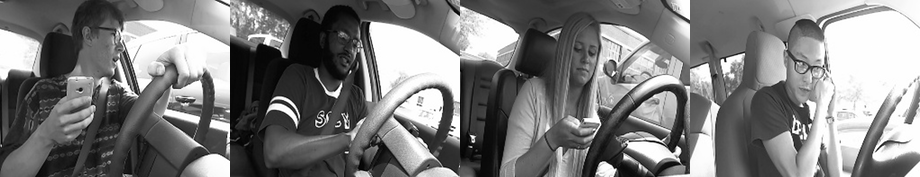

In [6]:
from IPython.display import Image
Image(filename='drivers_statefarm.png') 

Given a dataset of 2D dashboard camera images, State Farm is challenging Kagglers to classify each driver's behavior. Are they driving attentively, wearing their seatbelt, or taking a selfie with their friends in the backseat?

### Results

#### Training Loss and Accuracy

![](images/loss_ema.png)

![](images/accuracy_ema.png)

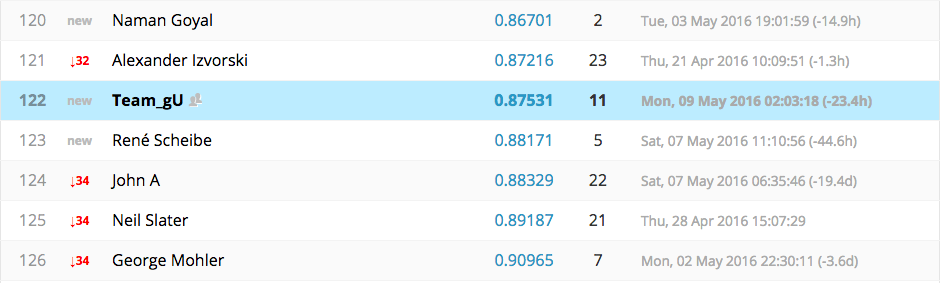

In [1]:
from IPython.display import Image
Image(filename='/Users/michaelulin/Desktop/leaderboard.png') 

### Preprocessing

1. <b> Downsampling </b> <br>
Initial images were 640 x 480 pixels (color). In order to speed training time, we reduced the image size to 32 x 28 <br><br>
2. <b> Normalization </b> <br>
In order to normalize the images, we subtracted out the mean pixel value (of each image in each color channel) and then divided the pixel values by 255.
<br><br>
3. <b> Stratified Sampling </b> <br>
We initially ran into some problems with overfitting the model. We discovered that the model was likely overfitting on individual drivers as drivers appeared in the dataset more than once. <br>
In order to compensate for this, we split the train and test sets by driver.


SKlearn has a function for this, LabelShuffleSplit: http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.LabelShuffleSplit.html

### Model Architecture

### VGG Neural Network
* Developed by the [Visual Geometry Group](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) at the University of Oxford. <br>
* It is class of very deep Convolutional Networks for large-scale Visual Recognition tasks. <br>
* **Won** the **first and the second places** in the localisation and classification tasks respectively at the **ImageNet ILSVRC-2014 contest**.

![](images/tensorboard2.png)

### Deep Residual Neural Network (Resnet)
* Developed by Microsoft Research. <br>
* **Won 1sth place** in classification tasks at the **ImageNet ILSVRC-2015 contest**. <br>
* The residual learning framework makes is easier to optimize much deeper networks, while maintaining a relativaly low complexity.
* Regular neural networks tend to **decrease in accuracy** at large depths, due to **information degradation**.
* Residual learning introduce **skip connections**, which allow information flow into the deeper layers and enable us to have **deeper networks** with **better accuracy**.

#### Residual Block

![](images/resnet.png)

#### Regularization

**Batch Normalization** 
* Method that deals with the *internal covariate shift* problem.
* Performs layer-wise normalization for each training mini-batch.
* Allows higher learning rates and less sensitive to bad initialization.
* Acts regularizer, in some cases eliminating the need for Dropout. 

*internal covariate shift* : Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities.

**Dropout**
* Regularizing method that significantly reduces overfitting
* At train time, randomly drop units (along with their connections) from the neural network.
* At test time, full network can be interpreted as performing model averaging or ensemble.
* Although Bach Norm already regularize the network, we found that our network was still overfitting. (partly due to small dataset)

#### Loss Function

**Cross Entropy**
$$H(y, \hat{y}) = \sum_i y_i \log \frac{1}{\hat{y}_i} = -\sum_i y_i \log \hat{y}_i$$

#### Activation

**Exponential linear unit (ELU)** (Not used in the final model)
* Reduces vanishing gradient problem.
* Introduces negative values which push the mean activation towards zero. 
* Reduces the bias shift and speeds up learning.
* Gives better accuracy and learning speed-up compared to the combination of ReLU and Batch Normalization.

![](images/ELU_plot.png)

### ELU Residual Block vs. ReLU Residual Block
** ReLU Residual Block**

![](images/RELU.png)

**ELU Residual Block**

![](images/ELU.png)

### Neural Network Architecture Comparison

![](images/NN.png)

### Implementation

Requirements:
    1. TensorFlow 0.8 : https://www.tensorflow.org/versions/r0.8/get_started/os_setup.html#pip-installation
    2. Cuda Toolkit 7.5 and cuDNN v4 : https://www.tensorflow.org/versions/r0.8/get_started/os_setup.html#optional-install-cuda-gpus-on-linux
    3. TensorPack (for Resnets): https://github.com/ppwwyyxx/tensorpack/tree/master/tensorpack

We trained our models on g2.8xlarge AWS instances. These have 4 gpus per instance. Each GPU has 1,536 CUDA cores and 4 GB of video memory. GPU instances need to be set up with Cuda and cuDNN.

http://docs.aws.amazon.com/AWSEC2/latest/UserGuide/using_cluster_computing.html#gpu-instance-current-limitations